# Practice 1.1: Classical Neural Networks
MQIST 2025/26: Quantum Computing and Machine Learning
Alfredo Chavert Sancho

## - Data Loading

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
import keras
from keras import layers
from keras.datasets import fashion_mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## - Preprocessing

In [ ]:
print(f"Train images: {train_images.shape}")
print(f"Train labels: {train_labels.shape}")
print(f"Test images: {test_images.shape}")
print(f"Test labels: {test_labels.shape}")

Train images: (60000, 28, 28)
Train labels: (60000,)
Test images: (10000, 28, 28)
Test labels: (10000,)


#### Data flattening

In [ ]:
train_images = train_images.reshape((60000, 28*28))
test_images = test_images.reshape((10000, 28*28))

#### Converting [0,255] integers to [0,1] floats

In [ ]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

#### One hot encoding

In [ ]:
train_labels = to_categorical(train_labels)
#test_labels = to_categorical(test_labels)

#### Validation data separation

In [ ]:
val_images = train_images[:10000]
val_labels = train_labels[:10000]
train_images = train_images[10000:]
train_labels = train_labels[10000:]

## - Neural Network Setup

#### Structural hyperparameters:
- Layers: 2
- Neurons per layer: 50
- Layer activation function: sigmoid
- Output activation function: softmax

In [ ]:
model = keras.Sequential(name='fashion_mnist')
model.add(layers.Input(shape=(28*28, )))
model.add(layers.Dense(50, name='hidden_1', activation='sigmoid')) # To change
model.add(layers.Dense(50, name='hidden_2', activation='sigmoid')) # To change
model.add(layers.Dense(10, name='output', activation='softmax'))

In [ ]:
model.summary()

Model: "fashion_mnist"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                     │ (None, 50)                  │          39,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_2 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,310 (165.27 KB)

 Trainable params: 42,310 (165.27 KB)

 Non-trainable params: 0 (0.00 B)

#### Learning hyperparameters:
- Optimizer: adam
- Loss function: categorical_crossentropy
- Learning rate: 0.01
- Epoch: 20
- Batch size: 512

In [ ]:
learning_rate = 0.001
opt = keras.optimizers.Adam(learning_rate = learning_rate)
loss_function = "categorical_crossentropy"
model.compile(optimizer = opt, loss = loss_function, metrics = ["accuracy"])
epochs = 25
batch_size = 512

In [ ]:
history = model.fit(train_images,
                    train_labels,
                    epochs = epochs,
                    batch_size = batch_size,
                    validation_data = (val_images, val_labels))

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4122 - loss: 2.0345 - val_accuracy: 0.6482 - val_loss: 1.2690
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6681 - loss: 1.1262 - val_accuracy: 0.7389 - val_loss: 0.8446
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7483 - loss: 0.7919 - val_accuracy: 0.7884 - val_loss: 0.6729
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7944 - loss: 0.6379 - val_accuracy: 0.8118 - val_loss: 0.5725
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8210 - loss: 0.5482 - val_accuracy: 0.8284 - val_loss: 0.5098
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8358 - loss: 0.4918 - val_accuracy: 0.8405 - val_loss: 0.4701
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8440 - loss: 0.4550 - val_accuracy: 0.8447 - val_loss: 0.4472
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8480 - loss: 0.4355 - val_accuracy: 0.8493 - val_loss:

In [ ]:
import matplotlib.pyplot as plt

def plot(axis, train, validation, title):
    # We create a list of epoch numbers from 1 to the length of the training set
    epochs = range(1, len(train) + 1)
    # Graph of the training data with a solid blue line
    axis.plot(epochs, train, 'b-o', label='Training ' + title)
    # Graph of the validation data with a red dashed line
    axis.plot(epochs, validation, 'r--o', label='Validation '+ title)
    # We set the title of the graph, the X and Y axis labels
    axis.set_title('Training and validation ' + title)
    axis.set_xlabel('Epochs')
    axis.set_ylabel(title)
    # We show the legend of the graph
    axis.legend()

def multiplot(history):
    fig, axes = plt.subplots(1, 2)
    fig.set_figwidth(11)
    plot(axes[0], history.history['loss'], history.history['val_loss'], 'loss')
    plot(axes[1], history.history['accuracy'], history.history['val_accuracy'], 'accuracy')

    # We show the graphs on screen
    plt.show()

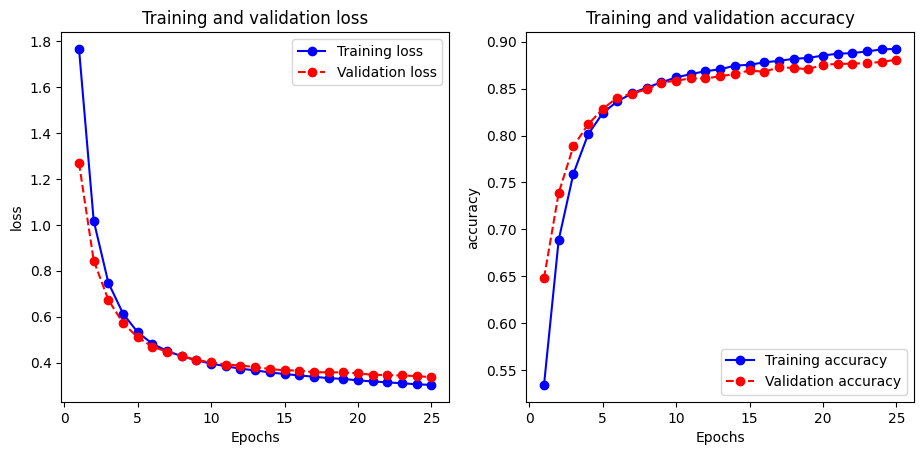

In [ ]:
history_dict = history.history
multiplot(history)

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
from sklearn.metrics import classification_report
# Evaluate the model
predicted_values = model.predict(test_images)
predicted_classes = np.argmax(predicted_values, axis =1)
# Classification report for precision, recall and f1-score
report = classification_report(test_labels, predicted_classes, target_names = ['T-shirt/top',
                                                                               'Trouser',
                                                                               'Pullover',
                                                                               'Dress',
                                                                               'Coat',
                                                                               'Sandal',
                                                                               'Shirt',
                                                                               'Sneaker',
                                                                               'Bag',
                                                                               'Ankle boot'])
# Print the evaluation metrics
print ("Classification Report:")
print (report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step
Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.81      0.84      0.82      1000
     Trouser       0.98      0.96      0.97      1000
    Pullover       0.78      0.77      0.78      1000
       Dress       0.86      0.89      0.87      1000
        Coat       0.77      0.81      0.79      1000
      Sandal       0.96      0.94      0.95      1000
       Shirt       0.70      0.63      0.66      1000
     Sneaker       0.92      0.95      0.93      1000
         Bag       0.95      0.97      0.96      1000
  Ankle boot       0.96      0.95      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



## - Regularization

#### Early stopping

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', mode="min", patience=5) # Usar val_accuracy (max)

#### Dropout, batch normalization, weight regularization and initialization

In [ ]:
from keras import regularizers, initializers
dropout_per = 0.1 # Dropout percentage per dense layer
reg = regularizers.l2(0.01) # L2 regularizer
init = initializers.GlorotUniform() # GlorotUniform initializer

In [ ]:
model_reg = keras.Sequential(name='fashion_mnist')
model_reg.add(layers.Input(shape=(28*28, )))
model_reg.add(layers.Dense(50, kernel_regularizer = reg, name='hidden_1', activation='sigmoid', kernel_initializer = init))
model_reg.add(layers.Dropout(dropout_per)) # Dropout layer
model_reg.add(layers.BatchNormalization()) # Batch normalization layer
model_reg.add(layers.Dense(50, kernel_regularizer = reg, name='hidden_2',activation='sigmoid', kernel_initializer = init))
model_reg.add(layers.Dropout(dropout_per)) # Dropout layer
model_reg.add(layers.BatchNormalization()) # Batch normalization layer
model_reg.add(layers.Dense(10, name='output',  activation='softmax'))

In [ ]:
model_reg.summary()

Model: "fashion_mnist"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                     │ (None, 50)                  │          39,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_2 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,710 (166.84 KB)

 Trainable params: 42,510 (166.05 KB)

 Non-trainable params: 200 (800.00 B)

In [ ]:
learning_rate = 0.001
opt_reg = keras.optimizers.Adam(learning_rate = learning_rate)
loss_function = "categorical_crossentropy"
epochs = 25
batch_size = 512
model_reg.compile(optimizer = opt_reg, loss = loss_function, metrics = ["accuracy"])
history_reg = model_reg.fit(train_images,
                    train_labels,
                    epochs = epochs,
                    batch_size = batch_size,
                    validation_data = (val_images, val_labels),
                    callbacks=[early_stopping])

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6537 - loss: 2.3235 - val_accuracy: 0.1632 - val_loss: 2.8223
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8387 - loss: 1.1223 - val_accuracy: 0.7028 - val_loss: 2.2308
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8475 - loss: 0.7911 - val_accuracy: 0.6729 - val_loss: 1.7573
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8527 - loss: 0.6443 - val_accuracy: 0.7972 - val_loss: 1.2385
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8547 - loss: 0.5699 - val_accuracy: 0.8341 - val_loss: 0.7911
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8583 - loss: 0.5277 - val_accuracy: 0.8456 - val_loss: 0.6210
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8583 - loss: 0.5051 - val_accuracy: 0.8414 - val_loss: 0.5528
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8616 - loss: 0.4837 - val_accuracy: 0.8243 - val_loss:

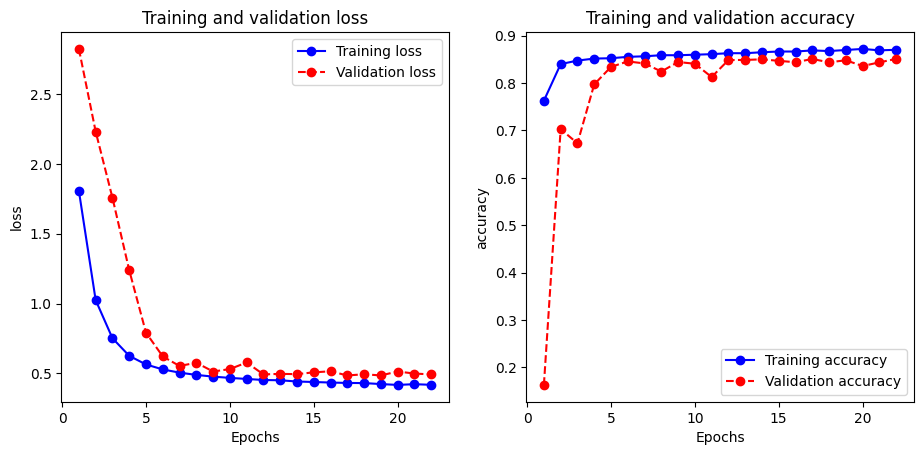

In [ ]:
history_dict_reg = history_reg.history
multiplot(history_reg)

In [ ]:
# Evaluate the model
predicted_values_reg = model_reg.predict(test_images)
predicted_classes_reg = np.argmax(predicted_values_reg, axis =1)
# Classification report for precision, recall and f1-score
report_reg = classification_report(test_labels, predicted_classes_reg, target_names = ['T-shirt/top',
                                                                               'Trouser',
                                                                               'Pullover',
                                                                               'Dress',
                                                                               'Coat',
                                                                               'Sandal',
                                                                               'Shirt',
                                                                               'Sneaker',
                                                                               'Bag',
                                                                               'Ankle boot'])
# Print the evaluation metrics
print ("Classification Report:")
print (report_reg)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.79      0.76      0.77      1000
     Trouser       0.99      0.94      0.97      1000
    Pullover       0.71      0.83      0.76      1000
       Dress       0.92      0.73      0.82      1000
        Coat       0.74      0.77      0.76      1000
      Sandal       0.95      0.92      0.93      1000
       Shirt       0.62      0.58      0.60      1000
     Sneaker       0.93      0.90      0.91      1000
         Bag       0.90      0.96      0.93      1000
  Ankle boot       0.88      0.97      0.92      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



## - Results

## - Conclusion